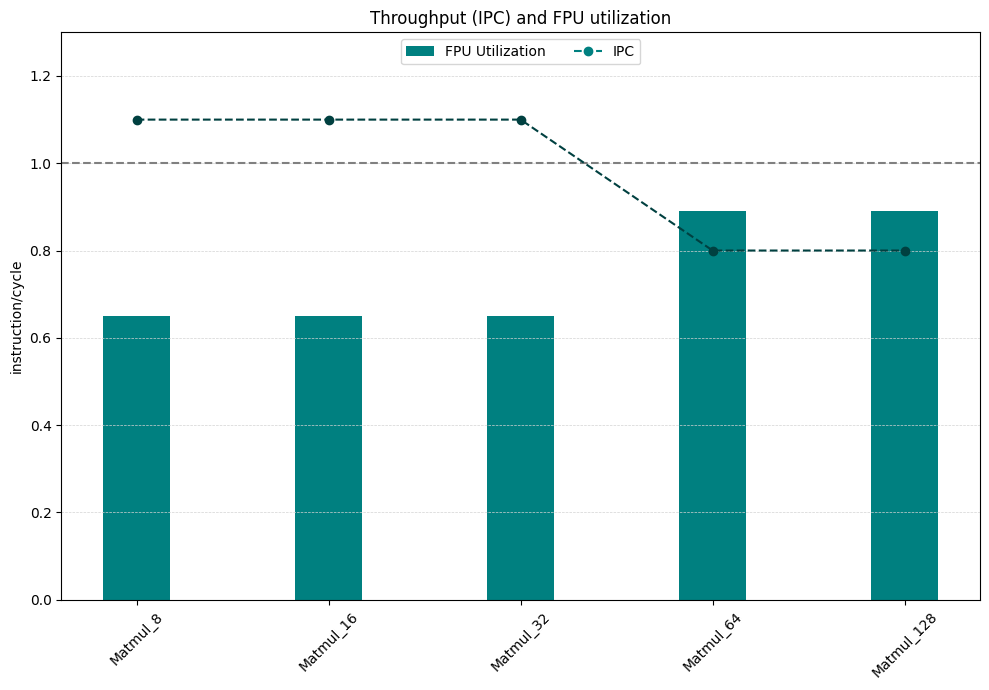

In [8]:
import colorsys
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


def scale_lightness(rgb, scale_l=1.0):
    h, l, s = colorsys.rgb_to_hls(*rgb)
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s=s)


with open("data.csv") as f:
    df = pd.read_csv(f, sep=",", skipinitialspace=True)

# Get unique 'name' values as bins
bins = df["name"].unique()
num_bins = len(bins)

# Prepare data for plotting
x_values = np.arange(num_bins)  # X-axis positions
bar_width = 0.35  # Width of each bar
color = "teal"

fig = plt.figure(1, figsize=(10, 7))
plt.clf()
ax = fig.gca()

# Plot bars
for idx, row in df.iterrows():
    ax.bar(
        idx,
        row["fpss_fpu_occupancy"],
        width=bar_width,
        label=row["name"],
        color=color,
    )

# Plot IPC lines
ax.plot(
    df["name"],
    df["total_ipc"],
    linestyle="--",
    marker="o",
    color=scale_lightness(colors.ColorConverter.to_rgb(color), 0.5),
    zorder=10,
)

# Draw a horizontal line at y=1
ax.axhline(y=1, color="grey", linestyle="--")

# Add grid
ax.grid(axis="y", color="lightgrey", linestyle="--", linewidth=0.5)

# Set y-axis limits to make room for the legend
y_max = max(df["total_ipc"].max(), df["fpss_fpu_occupancy"].max())
ax.set_ylim(0, y_max + 0.2)  # Manipulate the range of the y-axis

# Plot legend
ax.legend(
    loc="upper center",
    ncol=2,
    handles=[
        Patch(facecolor=color, label="FPU Utilization"),
        Line2D(
            [0],
            [0],
            color=color,
            linestyle="--",
            marker="o",
            label="IPC",
        ),
    ],
)
# Set x-axis ticks and labels
ax.set_xticks(x_values)
ax.set_xticklabels(bins, rotation=45)
ax.set_ylabel("instruction/cycle")
ax.set_title("Throughput (IPC) and FPU utilization")
plt.tight_layout()
plt.savefig("images/throughput_single.png")
plt.savefig("images/throughput_single.pdf")
plt.show()